<a href="https://colab.research.google.com/github/Udit0104/ML/blob/main/SoftmaxDemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=sns.load_dataset('iris')

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
# Applying Label Encoder to the species column and change them to numerical values
encoder=LabelEncoder()
df['species']=encoder.fit_transform(df['species'])

In [7]:
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
72,6.3,2.5,4.9,1.5,1
87,6.3,2.3,4.4,1.3,1
104,6.5,3.0,5.8,2.2,2
89,5.5,2.5,4.0,1.3,1
51,6.4,3.2,4.5,1.5,1


In [10]:
# Select only 2 input cols
df=df[['sepal_length','petal_length','species']]

In [11]:
df.sample(5)

,sepal_length,petal_length,species
135,7.7,6.1,2
98,5.1,3.0,1
52,6.9,4.9,1
74,6.4,4.3,1
48,5.3,1.5,0


In [12]:
X=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [19]:
# we select a class multinomial to use softmax regression in sklearn
clf=LogisticRegression(multi_class='multinomial')

In [20]:
clf.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

In [21]:
y_pred=clf.predict(X_test)

In [22]:
print(accuracy_score(y_test,y_pred))

0.9666666666666667


In [23]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1,2
0,14,0,0
1,0,7,1
2,0,0,8


In [24]:
# prediction
query=np.array([[3.4,2.7]])

In [27]:
# This will rpedict the probability of the flower whether it is species
# 1, 2 or 3. The ouput will be an array of size 3 = number of species
# specifying whether the flower is species 1, 2 or 3.

clf.predict_proba(query)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[7.25865651e-01, 2.73720718e-01, 4.13631316e-04]])

In [29]:
# Its output will be the maximum predixted prob for the flower
# In this case the max prob is of array[0]
clf.predict(query)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


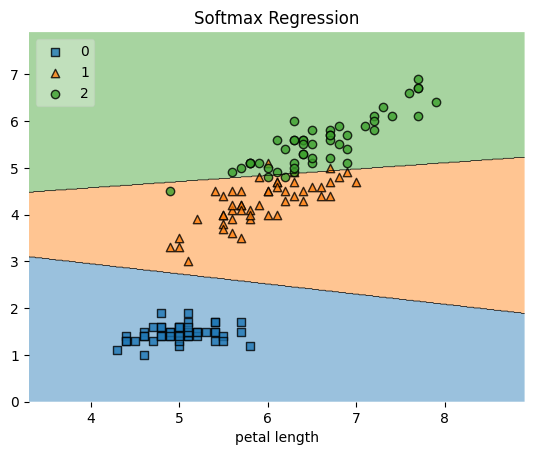

In [30]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X.values,y.values,clf,legend=2)

# Adding axes annotations
plt.xlabel('Sepal Length')
plt.xlabel('petal length')
plt.title('Softmax Regression')
plt.show()